In [1]:
#Импорт библиотек
import pandas as pd
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
#  Подключение к БД
con = duckdb.connect("../db/my.db")

In [3]:
# Загрузка таблиц
df_sales = con.execute("SELECT * FROM course_project.sales").df()
df_clients = con.execute("SELECT * FROM course_project.clients").df()
df_products = con.execute("SELECT * FROM course_project.products").df()
df_categories = con.execute("SELECT * FROM course_project.product_category").df()

In [ ]:
#  Объединение
df = df_sales.merge(df_clients, left_on="clientid", right_on="Clientid") \
             .merge(df_products, on="productid") \
             .merge(df_categories, on="categoryid")
df["revenue"] = df["price"] * df["amount"]

In [ ]:
#  Общая информация
print(df.info())
print(df.describe())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681 entries, 0 to 680
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sale_id            681 non-null    int32         
 1   clientid           681 non-null    int32         
 2   orderdate          681 non-null    datetime64[us]
 3   productid          681 non-null    int32         
 4   amount             681 non-null    int32         
 5   payment_method     681 non-null    object        
 6   city               681 non-null    object        
 7   reviewscore        551 non-null    float64       
 8   saledate           681 non-null    object        
 9   Clientid           681 non-null    int32         
 10  Name               681 non-null    object        
 11  BirthDate          681 non-null    datetime64[us]
 12  MaritalStatus      681 non-null    object        
 13  Address            681 non-null    object        
 14  Phone     

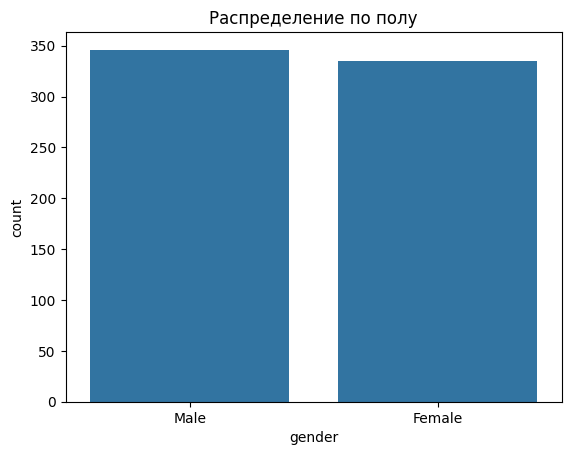

In [ ]:
# Гендерное распределение
sns.countplot(x="gender", data=df)
plt.title("Распределение по полу")
plt.show()


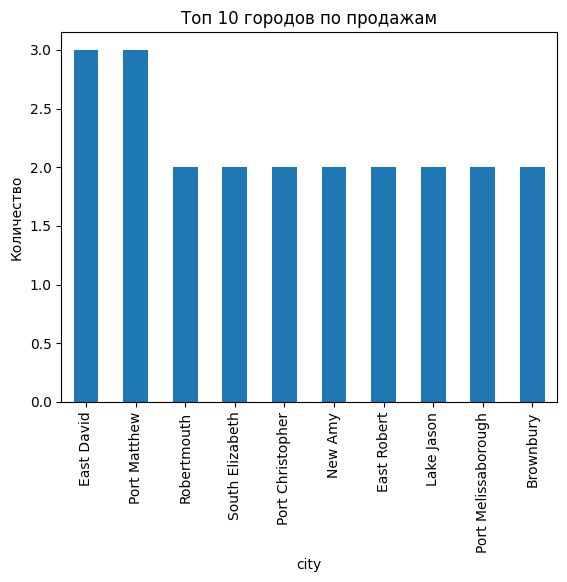

In [ ]:

# Города
top_cities = df["city"].value_counts().head(10)
top_cities.plot(kind="bar", title="Топ 10 городов по продажам")
plt.ylabel("Количество")
plt.show()

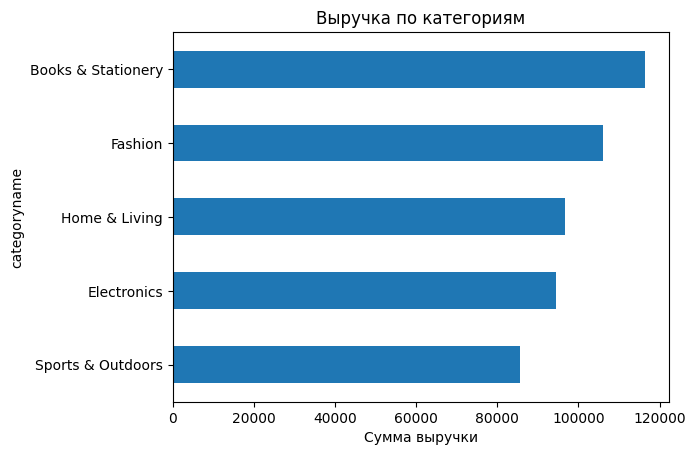

In [ ]:
# Выручка по категориям
category_revenue = df.groupby("categoryname")["revenue"].sum().sort_values()
category_revenue.plot(kind="barh", title="Выручка по категориям")
plt.xlabel("Сумма выручки")
plt.show()

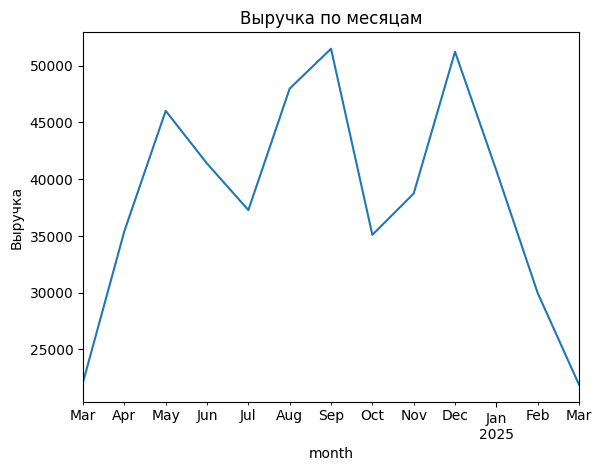

In [ ]:
# Выручка по месяцам
df["orderdate"] = pd.to_datetime(df["orderdate"])
df["month"] = df["orderdate"].dt.to_period("M")
monthly_revenue = df.groupby("month")["revenue"].sum()
monthly_revenue.plot(title="Выручка по месяцам")
plt.ylabel("Выручка")
plt.show()